<a href="https://colab.research.google.com/github/ProYulia/Hello_Python/blob/main/hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дана функция: f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

Для данной функции необходимо:

- Построить график

- Определить корни 

- Найти интервалы, на которых функция возрастает и убывает 

- Определить промежутки, на котором f > 0 и f < 0


In [4]:
from sympy import symbols, sin, cos
from sympy.plotting import plot
from scipy.optimize import fsolve
# import numpy as np

In [ ]:
x = symbols('x')
plot(-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30)

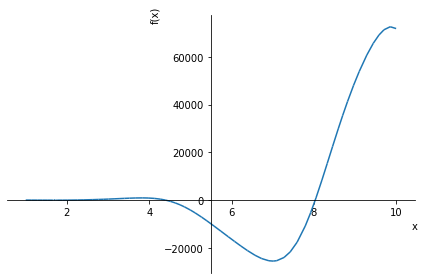

In [29]:
x = symbols('x')
plot(-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30, (x, 1, 10))


In [5]:
def f(x):
  return -12 * x**4 * np.sin(np.cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30

[8.03516413]


Запрашиваем у пользователя интервал для анализа:

In [17]:
segment = list(map(float, input('Задайте через пробел интервал для x: ').split()))
left_point = min(segment)
right_point = max(segment)

Задайте через пробел интервал для x: 1 10


Ищем корни уравнения для заданного интервала:

In [36]:
def find_roots():
  global left_point, right_point
  number = left_point
  right_point = right_point
  roots = []
  growth_interval = []

  while number < right_point:
      if f(number) >= 0 and f(number + 1) <= 0:
          w = fsolve(f, number)
          roots.append(*w)
      if f(number) <= 0 and f(number + 1) >= 0:
          w = fsolve(f, number)
          roots.append(*w)
      if f(number) > f(number + 1) < f(number + 2):
          growth_interval.append(number + 1)
      number += 1
  roots = [round(i,2) for i in roots]
  print(f'Корни уравнения для заданного интервала: {roots}')
  return roots

Корни уравнения для заданного интервала: [2.27, 4.38, 8.04]


[2.27, 4.38, 8.04]

Ищем промежутки на заданном интервале, где f>0 и f<0:

In [ ]:
def search_top(left, right):
    array = []
    temp = left
    while left < right:
        array.append([f(left), left])
        left += 0.1
    if array[0][0] > 0:
        print(f'f > 0 в промежутке {temp, right}')
        return max(array)
    else:
        print(f'f < 0 в промежутке {temp, right}')
        return min(array)


Ищем вершины функции на заданном интервале:

In [39]:
def find_func_top():
  roots = find_roots()

  if len(roots) < 2:
      print('На заданном интервале нет вершин')
  else:
      top = []
      for i in range(len(roots) - 1):
        top.append(search_top(roots[i], roots[i + 1]))
      # [print(item[1], ',', item[0]) for item in top]
      for item in top:
        item = [round(i,2) for i in item]
        print(f'Координаты вершины на заданном интервале: [{item[1]}, {item[0]}]')
      if len(top) < 2:
          print('Недостаточно данных для анализа, измените интервал')
      else:
          for i in range(len(top) - 1):
              if top[i][0] > top[i + 1][0]:
                  print('Функция убывает')
              else:
                  print('Функция возрастает')
find_func_top()

Корни уравнения для заданного интервала: [2.27, 4.38, 8.04]
f < 0 в промежутке (2.27, 4.38)
f > 0 в промежутке (4.38, 8.04)
Координаты вершины на заданном интервале: [2.27, -0.88]
Координаты вершины на заданном интервале: [4.38, 12.9]
Функция возрастает
